# <center> Environment Project</center>
#### <center> João Rodrigues 102487  &  Guilherme Casal 102587 </center>
### <center> Analysis of environment data </center>

##### In this work, we will use the data produced in the previous one, i.e., the data is clean, filtered accordingly to our requirements,so is prepared for exploratory data analysis.

##### Exploratory Data Analysis


What is Exploratory Data analysis? [1]     
An exploratory analysis looks at the data from as many angles as possible. The main goal is to answer some questions with the data, and, most of the time, they are not visible looking at the data itself, so,  we need to use various techniques  in order to get those answer. However, the solution may not be unique, because its not obtain through models, or rigid statistic models, most of the time, the solution is obtained trought observation of the analyst. For exmaple, when the solution is available through visualization methods, the probability of the solution being unique is low, because it will be result of the analyst's interpretation.

In [351]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

from scipy.stats import boxcox
plt.style.use('ggplot')

Just by viewing at raw data we can have take some conclusions :

- We are dealing with a time series and every instance is a different year.
- All elementes of the data are numeric, more specifically, float type
- There are no null values dues to the work done previously over the data
- The scales between variable is really high

Still, there is not much that we can infer so, we will work the data in order to make it more informative, just by looking  at it

In this data we have included some health conditions, as explain in the last work, this was done to surpass the lack of data, in other words, the imbalancement of the data.  

In [352]:
data1 = pd.read_csv("merged_2015")
data1 = data1.rename(columns={'Unnamed: 0': 'Year'})
data1 = data1.set_index('Year')
data1.head(5).round(2)

,all_motor_vehicles,NO2 Air,PM10 Air,SO2 Air,Air pollution,Cancer,Respiratory conditions,Ammonia (NH3),Sulphur oxides (SOX),Methane (CH4),Nitrogen oxides (NOX)
Year,,,,,,,,,,,
2015,49450382.0,54.47,23.72,2.89,10.44,3.22,10.98,33700.0,180000.0,286000.0,225000.0
2016,49472094.0,56.38,23.21,4.28,11.45,3.22,10.98,34700.0,264000.0,270000.0,457000.0
2017,49833281.0,51.23,21.69,3.19,11.48,3.22,10.98,33700.0,264000.0,254000.0,523000.0
2018,51555695.0,46.55,22.21,1.96,11.46,3.22,10.98,32700.0,208500.0,1322000.0,392000.0
2019,52646698.0,44.44,22.94,6.11,11.20,3.41,11.17,21400.0,208500.0,1322000.0,375500.0


In [353]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 2015 to 2021
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   all_motor_vehicles      7 non-null      float64
 1   NO2 Air                 7 non-null      float64
 2   PM10 Air                7 non-null      float64
 3   SO2 Air                 7 non-null      float64
 4   Air pollution           7 non-null      float64
 5   Cancer                  7 non-null      float64
 6   Respiratory conditions  7 non-null      float64
 7   Ammonia (NH3)           7 non-null      float64
 8   Sulphur oxides (SOX)    7 non-null      float64
 9   Methane (CH4)           7 non-null      float64
 10  Nitrogen oxides (NOX)   7 non-null      float64
dtypes: float64(11)
memory usage: 672.0 bytes


In [354]:
data2 = pd.read_csv("merged_no_health")
data2 = data2.rename(columns={'Unnamed: 0': 'Year'})
data2 = data2.set_index('Year')
data2.head(5).round(2)

,all_motor_vehicles,NO2 Air,PM10 Air,SO2 Air,Ammonia (NH3),Sulphur oxides (SOX),Methane (CH4),Nitrogen oxides (NOX)
Year,,,,,,,,
2007,54834530.0,57.68,26.10,3.78,34200.0,247000.0,130000.0,670500.0
2008,55040271.0,57.02,26.39,4.07,43300.0,265000.0,173500.0,791500.0
2009,54216130.0,58.33,25.81,3.49,51400.0,373000.0,262500.0,823000.0
2010,51921676.0,58.63,25.43,3.93,35200.0,168000.0,159000.0,496500.0
2011,50247234.0,55.87,27.64,2.88,32700.0,245000.0,1184000.0,1007500.0


In [355]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 2007 to 2021
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   all_motor_vehicles     15 non-null     float64
 1   NO2 Air                15 non-null     float64
 2   PM10 Air               15 non-null     float64
 3   SO2 Air                15 non-null     float64
 4   Ammonia (NH3)          15 non-null     float64
 5   Sulphur oxides (SOX)   15 non-null     float64
 6   Methane (CH4)          15 non-null     float64
 7   Nitrogen oxides (NOX)  15 non-null     float64
dtypes: float64(8)
memory usage: 1.1 KB


### Summary Statistic 

The first thing that we can notice is that all the variables have the same number examples, that's because  we are dealing with time series, so the existence of a gap it's a problem, because it interrupts the evolution of the values over time. This problem was solved in the previous delivery.  
Then,  It's possible the get some importante informations about the data, for example, we can see the standard deviation and the means are in completly different scales, so, their values dwell in different ranges and, as it is, it's impossble to do any comparations or to retrive any conclusions of the data


In [356]:
data1.describe().round(2)

,all_motor_vehicles,NO2 Air,PM10 Air,SO2 Air,Air pollution,Cancer,Respiratory conditions,Ammonia (NH3),Sulphur oxides (SOX),Methane (CH4),Nitrogen oxides (NOX)
count,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00
mean,47956427.71,51.99,22.96,3.66,10.44,3.25,11.15,32085.71,224142.86,572857.14,379214.29
std,4724036.03,4.76,0.75,1.30,1.36,0.11,0.26,4753.04,30616.87,511857.87,94520.66
min,39938321.00,44.44,21.69,1.96,8.22,3.09,10.98,21400.00,180000.00,254000.00,225000.00
25%,46124452.50,48.89,22.58,3.04,9.65,3.22,10.98,33200.00,208500.00,274000.00,341000.00
50%,49472094.00,54.47,23.21,3.59,11.20,3.22,10.98,33700.00,222000.00,278000.00,375500.00
75%,50694488.00,55.42,23.47,3.94,11.45,3.30,11.23,34200.00,243000.00,804000.00,424500.00
max,52646698.00,56.38,23.72,6.11,11.48,3.41,11.66,34700.00,264000.00,1322000.00,523000.00


In [357]:
data2.describe().round(2)

,all_motor_vehicles,NO2 Air,PM10 Air,SO2 Air,Ammonia (NH3),Sulphur oxides (SOX),Methane (CH4),Nitrogen oxides (NOX)
count,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00
mean,49966055.13,55.59,25.36,3.47,34693.33,241133.33,727533.33,522633.33
std,4102397.52,4.66,2.11,0.93,6256.56,58978.65,583163.92,212218.64
min,39938321.00,44.44,21.69,1.96,21400.00,168000.00,130000.00,225000.00
25%,49255036.50,55.17,23.47,3.03,33200.00,208500.00,258000.00,382833.33
50%,49833281.00,57.02,25.81,3.19,33700.00,213000.00,286000.00,457000.00
75%,52284187.00,58.48,27.07,3.86,34450.00,264000.00,1322000.00,608583.33
max,55040271.00,60.07,28.26,6.11,51400.00,373000.00,1760000.00,1007500.00


### Transformations

In this chapter the data will suffer transformations in order to facilitate the analysis proccess, with this, we are trying to "fit all the features in the enviroment", and make the conclusions more trustfull

#### Simple Distribution plots and application of Tukey’s ladder of powers

[3] When analyzing data, it's important to understand the distribution of the data. The distribution refers to how the data is spread out or clustered around certain values or ranges. By examining the distribution, we can gain insights into the characteristics and patterns of the data, which can be useful in making informed decisions and predictions. 

To know the best lambda value we used a method called BoxCox . Essencially, BoxCox will tranform a data that isn't distributed normally to a normally distributed data, using the different values of powers,i.e, a<sup>b</sup>  and get the optimal value of b, which aproximates the data to the bell shape

In [358]:
def plot_dist(data, figsize=(12, 8)):
    lambdas = []
    plt.figure(figsize=figsize)
    
    # Calculate the number of rows needed based on the number of columns
    num_rows = (len(data.columns) + 1) // 2
    num_rows = num_rows*2
    j = 1
    for i, k in enumerate(data.columns, start=1):
        plt.subplot(num_rows, 2, j)
        sns.histplot(data[k], kde=True,bins=10)
        plt.title(f'{k}')
        plt.subplot(num_rows, 2, j+1)
        a,b = boxcox(data[k])
        sns.histplot(a, kde=True,bins=10)
        plt.title(f'{k} lambda = {b.round(2)}')
        lambdas.append(b)
        j+=2
        
    
    # Adjust layout
    plt.tight_layout()
    plt.show()
    return lambdas


In this next figure we can see the original data1(the one with variables related with health conditions) and its transformation given a certain value of lambda.  
The transformation obtained in the Respiratory conditions will not be considered, as the data is not perciptible, due to difference of scaling between the axis

In [359]:
data1

,all_motor_vehicles,NO2 Air,PM10 Air,SO2 Air,Air pollution,Cancer,Respiratory conditions,Ammonia (NH3),Sulphur oxides (SOX),Methane (CH4),Nitrogen oxides (NOX)
Year,,,,,,,,,,,
2015,49450382.0,54.466667,23.725000,2.891667,10.435721,3.222155,10.976621,33700.0,180000.0,286000.0,225000.0
2016,49472094.0,56.375000,23.208333,4.283333,11.451568,3.222155,10.976621,34700.0,264000.0,270000.0,457000.0
2017,49833281.0,51.233333,21.691667,3.191667,11.480882,3.222155,10.976621,33700.0,264000.0,254000.0,523000.0
2018,51555695.0,46.550000,22.208333,1.958333,11.457786,3.222155,10.976621,32700.0,208500.0,1322000.0,392000.0
2019,52646698.0,44.442857,22.942857,6.114286,11.196704,3.412539,11.165615,21400.0,208500.0,1322000.0,375500.0
2020,39938321.0,55.420833,23.466667,3.587500,8.854768,3.384097,11.290680,34200.0,222000.0,278000.0,341000.0
2021,42798523.0,55.420833,23.466667,3.587500,8.221743,3.088371,11.663465,34200.0,222000.0,278000.0,341000.0


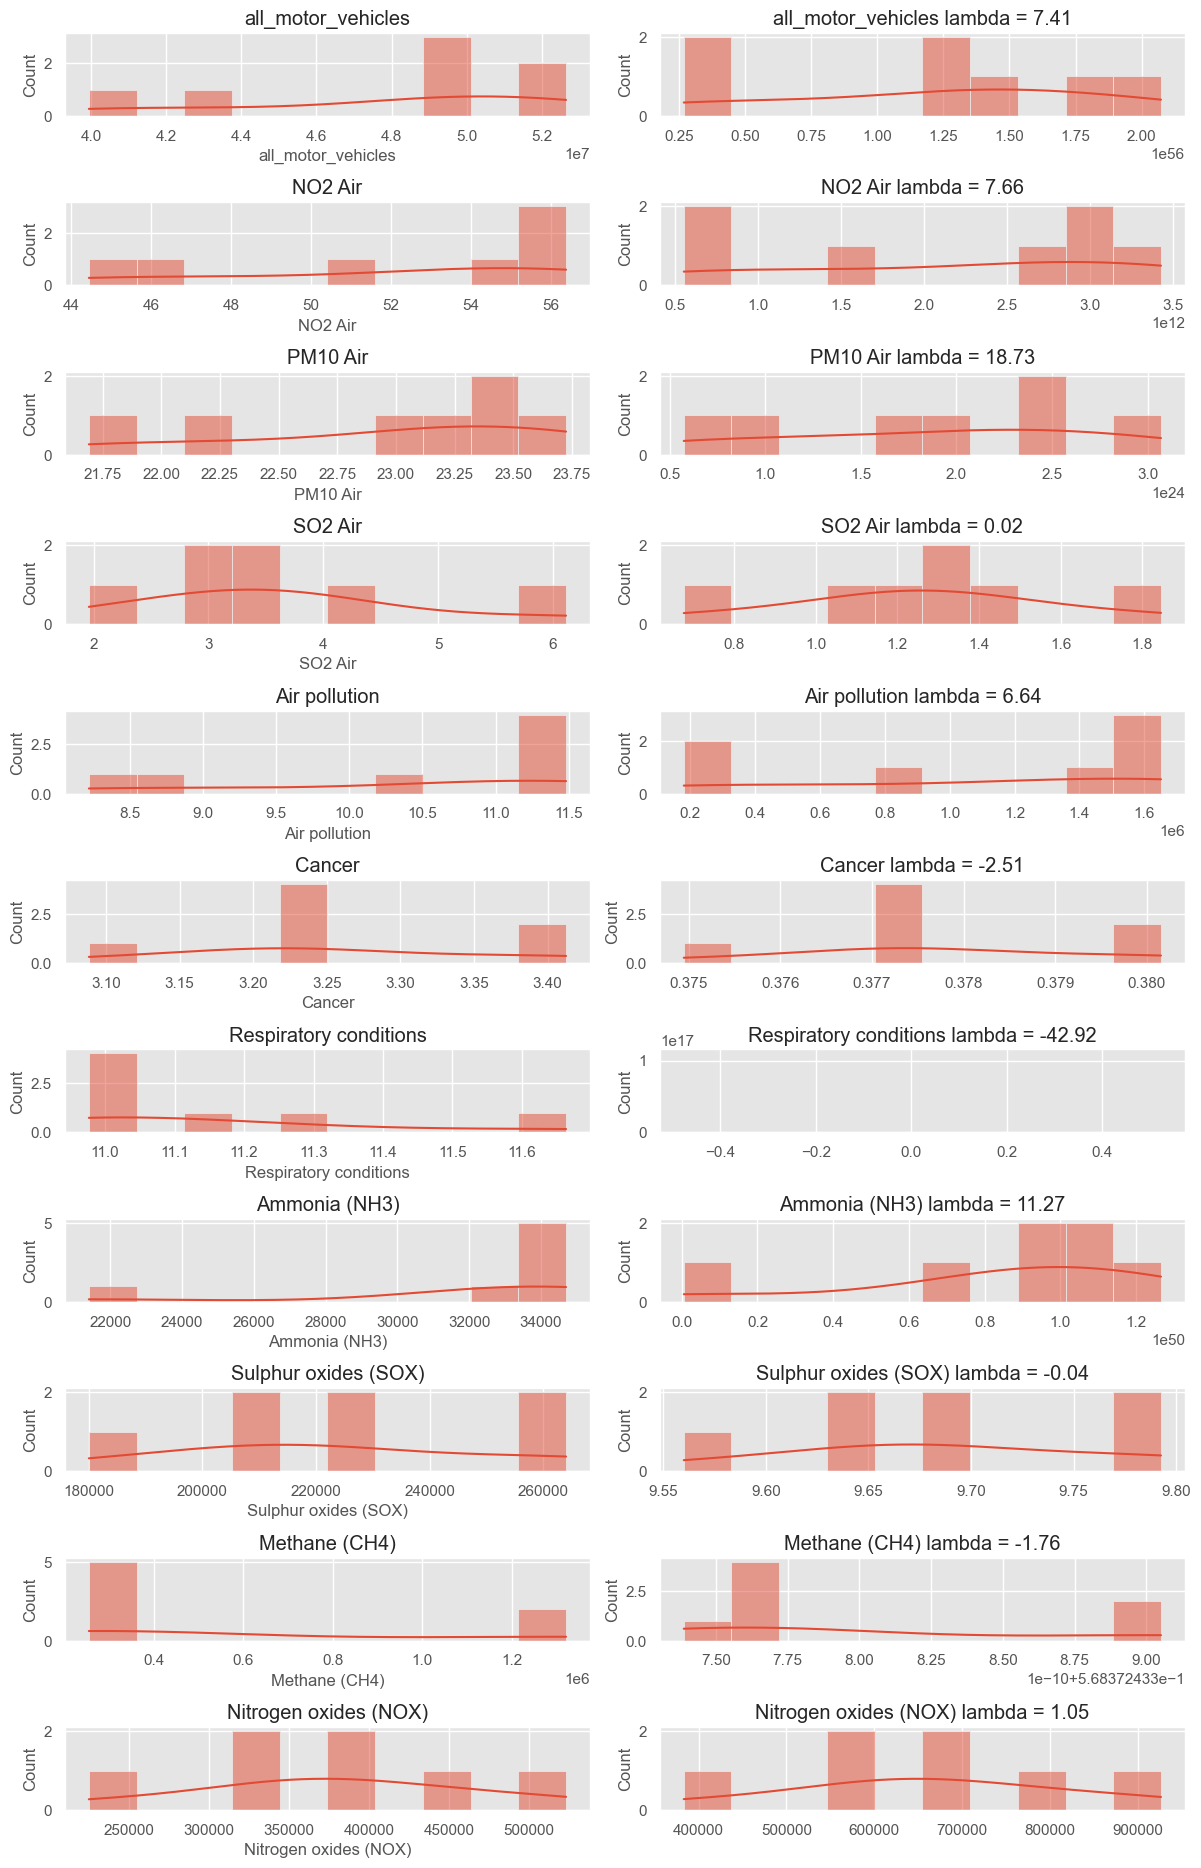

In [360]:

lambdas = plot_dist(data1,figsize=(12,20))

In [361]:
lambdas[6]=1
lambdas = pd.DataFrame(lambdas).T
data1_old = data1
data1 = pd.DataFrame(data1.values** lambdas.values.flatten(),columns=data1.columns)
data1.index = data1_old.index

All the transformations concerning the data2 demonstrated some improvement in the shape of the data distribution, so they will be applied and used in the next analysis

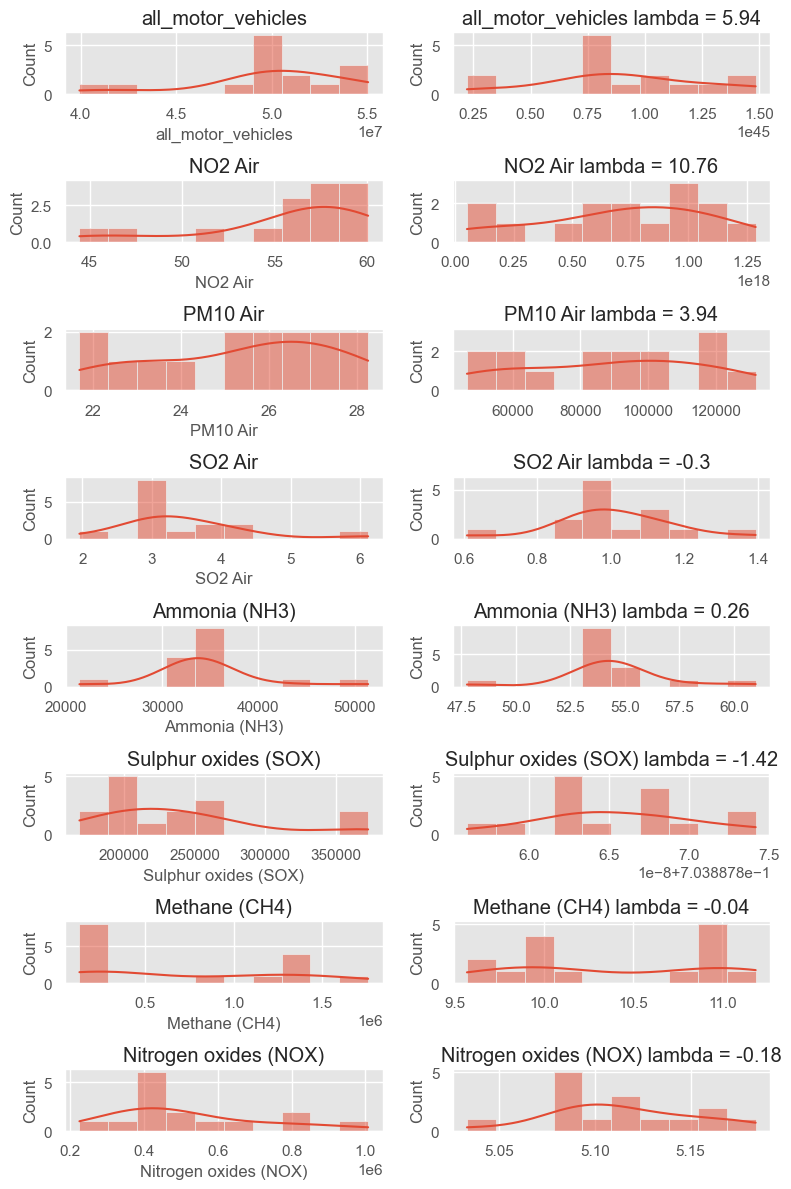

In [362]:
lambdas = plot_dist(data2,figsize=(8,12))

In [363]:
lambdas = pd.DataFrame(lambdas).T
data2_old = data2
data2 = pd.DataFrame(data2.values** lambdas.values.flatten(),columns=data2.columns)
data2.index = data2_old.index



#### Normalization

The second tranformation applied is normalization and the method chosen is Z-score normalization  
Now, it's possible to reach so conclusion, by raw analysing the data:

- The cancer rate, had highly decreased since 2019 and hasd a big leap in 2021
- The respiratory conditions values started growing since 2019, and reached its maximun value at 2021, being the value way higher than the others.
- Air pollution decreased from 2020 on, similiary to vehicles flow.

In [364]:
data1 = (data1-data1.mean())/data1.std()
data1

,all_motor_vehicles,NO2 Air,PM10 Air,SO2 Air,Air pollution,Cancer,Respiratory conditions,Ammonia (NH3),Sulphur oxides (SOX),Methane (CH4),Nitrogen oxides (NOX)
Year,,,,,,,,,,,
2015,0.124221,0.416349,1.302243,-0.525431,-0.336905,0.237017,-0.655211,0.166196,1.551976,0.404115,-1.620922
2016,0.130695,1.105527,0.160506,0.597542,0.822723,0.237017,-0.655211,1.021770,-1.255036,0.615931,0.822705
2017,0.241093,-0.437962,-1.445415,-0.244178,0.865855,0.237017,-0.655211,0.166196,-1.255036,0.865433,1.530405
2018,0.843416,-1.180832,-1.095935,-1.630185,0.831819,0.237017,-0.655211,-0.464807,0.469554,-1.448558,0.130411
2019,1.297587,-1.385476,-0.273085,1.622852,0.473009,-1.379931,0.073270,-2.013241,0.469554,-1.448558,-0.044503
2020,-1.455186,0.741196,0.675843,0.089700,-1.239481,-1.158447,0.555334,0.561943,0.009494,0.505819,-0.409048
2021,-1.181826,0.741196,0.675843,0.089700,-1.417020,1.590309,1.992242,0.561943,0.009494,0.505819,-0.409048




- Vehicles flow higly decreased in 2020  and it's maximun values were reached between 2007 and 2009
- Emisson of  NH3 and  the quantity of S02 in the air, appear having similar beahvior and even having somo similarities with traffic flow 
- Ch4 had high increament in 2018
- Emission of NOX was irregular until 2016

In [365]:
data2=(data2-data2.mean())/data2.std()
data2

,all_motor_vehicles,NO2 Air,PM10 Air,SO2 Air,Ammonia (NH3),Sulphur oxides (SOX),Methane (CH4),Nitrogen oxides (NOX)
Year,,,,,,,,
2007,1.513797,0.328317,0.259706,-0.493381,-0.018860,-0.371466,1.427612,-0.837587
2008,1.604308,0.069903,0.417107,-0.775690,1.343575,-0.664205,1.110478,-1.237072
2009,1.251647,0.617188,0.107389,-0.181633,2.387793,-1.735782,0.661332,-1.329361
2010,0.399455,0.759782,-0.081154,-0.648107,0.143116,1.872636,1.206013,-0.083797
2011,-0.115487,-0.317024,1.151922,0.604131,-0.268520,-0.335706,-0.916530,-1.797667
2012,-0.456320,1.549413,0.571721,0.437569,-0.068135,0.349344,-0.617221,0.607314
2013,-0.432779,0.564327,1.555872,0.182436,-0.184376,0.589644,-1.317520,0.595576
2014,-0.316699,-0.053180,-0.085252,0.357418,-0.184376,-1.647194,0.663384,-0.329650
2015,-0.332504,-0.694199,-0.842286,0.591945,-0.101164,1.375715,0.569175,2.103742


### Correlations and Covariances

Now, some analysis will be done around the covariance matrixes, that actually are correaltion matrixes, since the data is normalize.  
It's almost impossible to whitdraw some of information of the convariance matrix because the scales are too diferent, so, the correlation will be the only one considered


 Correlation  may  be  described  as  the  degree  of  association  between two variables. The correaltion can vary in an interval between -1 and 1.

We will only visualize values of correlation  between 0.5 - 1 and -1 - (-0.5) because those are the ranges that show some kind of relationship accordingly to [1], being 0.5 - 0.75 a moderate
relationship and 0.75 - 1 a strong relationship, this is applied also for the negative values, the fact that they are negative doesn't mean absence of correlation, the correlation is just negative, in other words, when one variable increases the other one deacreases.  


##### Data1

In [366]:
corr1 = data1.corr()

For this data we will only analyze health conditions:

-  Respiratory conditions decrease when there is an increament of the traffic flow and high air pollution
-  Air pollution and traffic flow beahaviors are highly similar, also Air pollution tend to deacrease when the quantity of N02 and PM10  decreases in the air.
-  Cancer is related to the emission of ammonia and this one decreases when the quantity of SO2 increases and vice-versa.

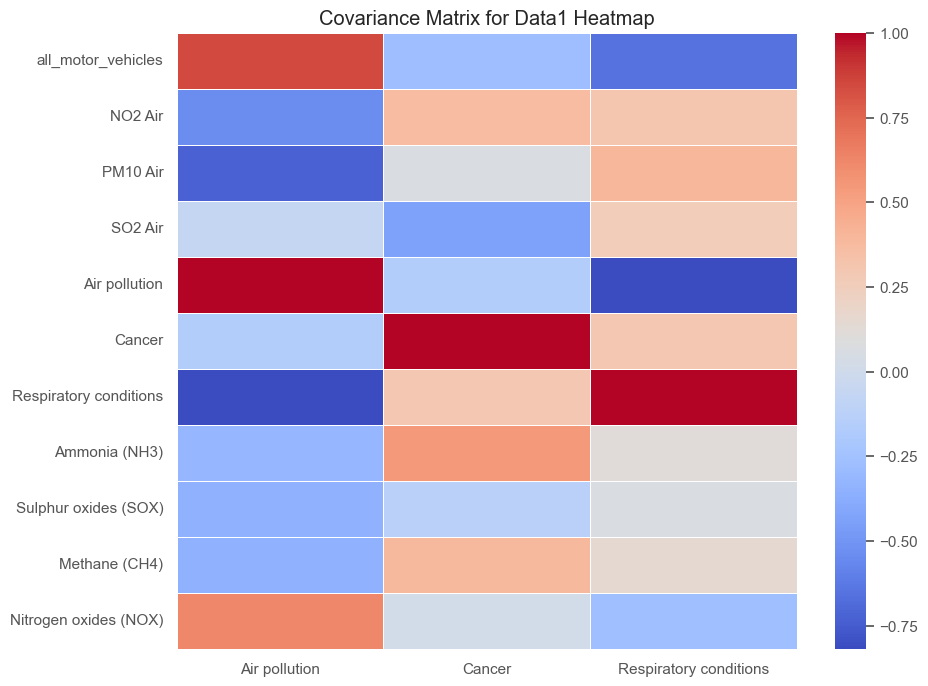

In [367]:
data_columns = ["Air pollution", "Cancer", "Respiratory conditions"]
heatmap_data = corr1.loc[data_columns, :].T

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', fmt=".2f", linewidths=0.5, xticklabels=data_columns)
plt.title('Covariance Matrix for Data1 Heatmap')

# Rotate the y-axis labels for better visibility
plt.yticks(rotation=0)

plt.show()

##### Data2

In [368]:
['Methane (CH4)', 'all_motor_vehicles', 'Respiratory conditions',
                  'Air pollution','PM10 Air','NO2 Air',
                  'Cancer','SO2 Air','Ammonia (NH3)']
corr2 = data2.corr()

- Traffic flow beahavior is opposite to NOX emissions  
- N02 has high correalation with PM10 
- SOX and NOX emission have a solid correlation


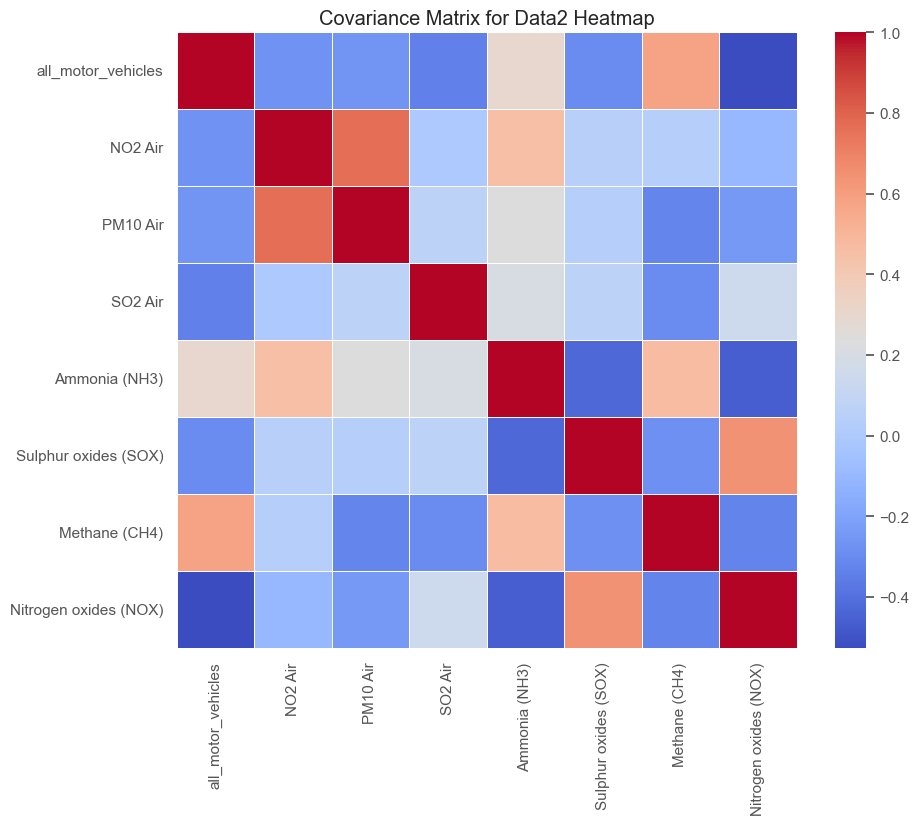

In [369]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr2, cmap='coolwarm', fmt=".2f", linewidths=0.5,)
plt.title('Covariance Matrix for Data2 Heatmap')
plt.show()

## Multiple Relations

In this chapter we will visualize the conclusions done in the previous one, because we will always will have a different perspective on the data by visualizing it, and, the objetive is verify is those assumptions actually  make sense, so,  not every variable will be represented. 

In [370]:
def plot_variable_pairs(data, pairs_to_plot, figsize=(12, 15)):
    num_pairs = len(pairs_to_plot)
    num_rows = int(np.ceil(num_pairs / 2))  # Calculate the number of rows needed

    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=figsize)
    fig.suptitle('Evolution of Variables Over Time', fontsize=16)

    axes = axes.flatten()  # Flatten the array for one-dimensional indexing

    for i, variable_tuple in enumerate(pairs_to_plot):
        ax = axes[i]
        
        for column in variable_tuple:
            ax.plot(data.index, data[column], label=column)

        ax.set_xlabel('Year')
        ax.set_ylabel('Variable Value')
        ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

The visualization methods chosen were pair plot and line chart.  

The pair plot allow us to see the evolution of a variable upon another one, if the majoraty of point have the tendency of forming a line then they have soem kind of correlation.  
The line chart can show the indivual beahavior of each variable over time, but, with that information, It's possible  conclude if there are variables with similar behavior 

In this pair plot we can conclude that:

- Respiratory conditions is positively correlated with PM10 in the aire and negatively correlated Air pollution
- Air pollution is positively correlated with traffic flow and negatively correlated with PM10, NO2 in the air and with CH4 emission.
- Cancer is positively correlated with NH3 and negatively correlated with SO2 in the air.In this variable the virtual lines are not so clearly detected , even so,  the correaltion metioned are the most significative.

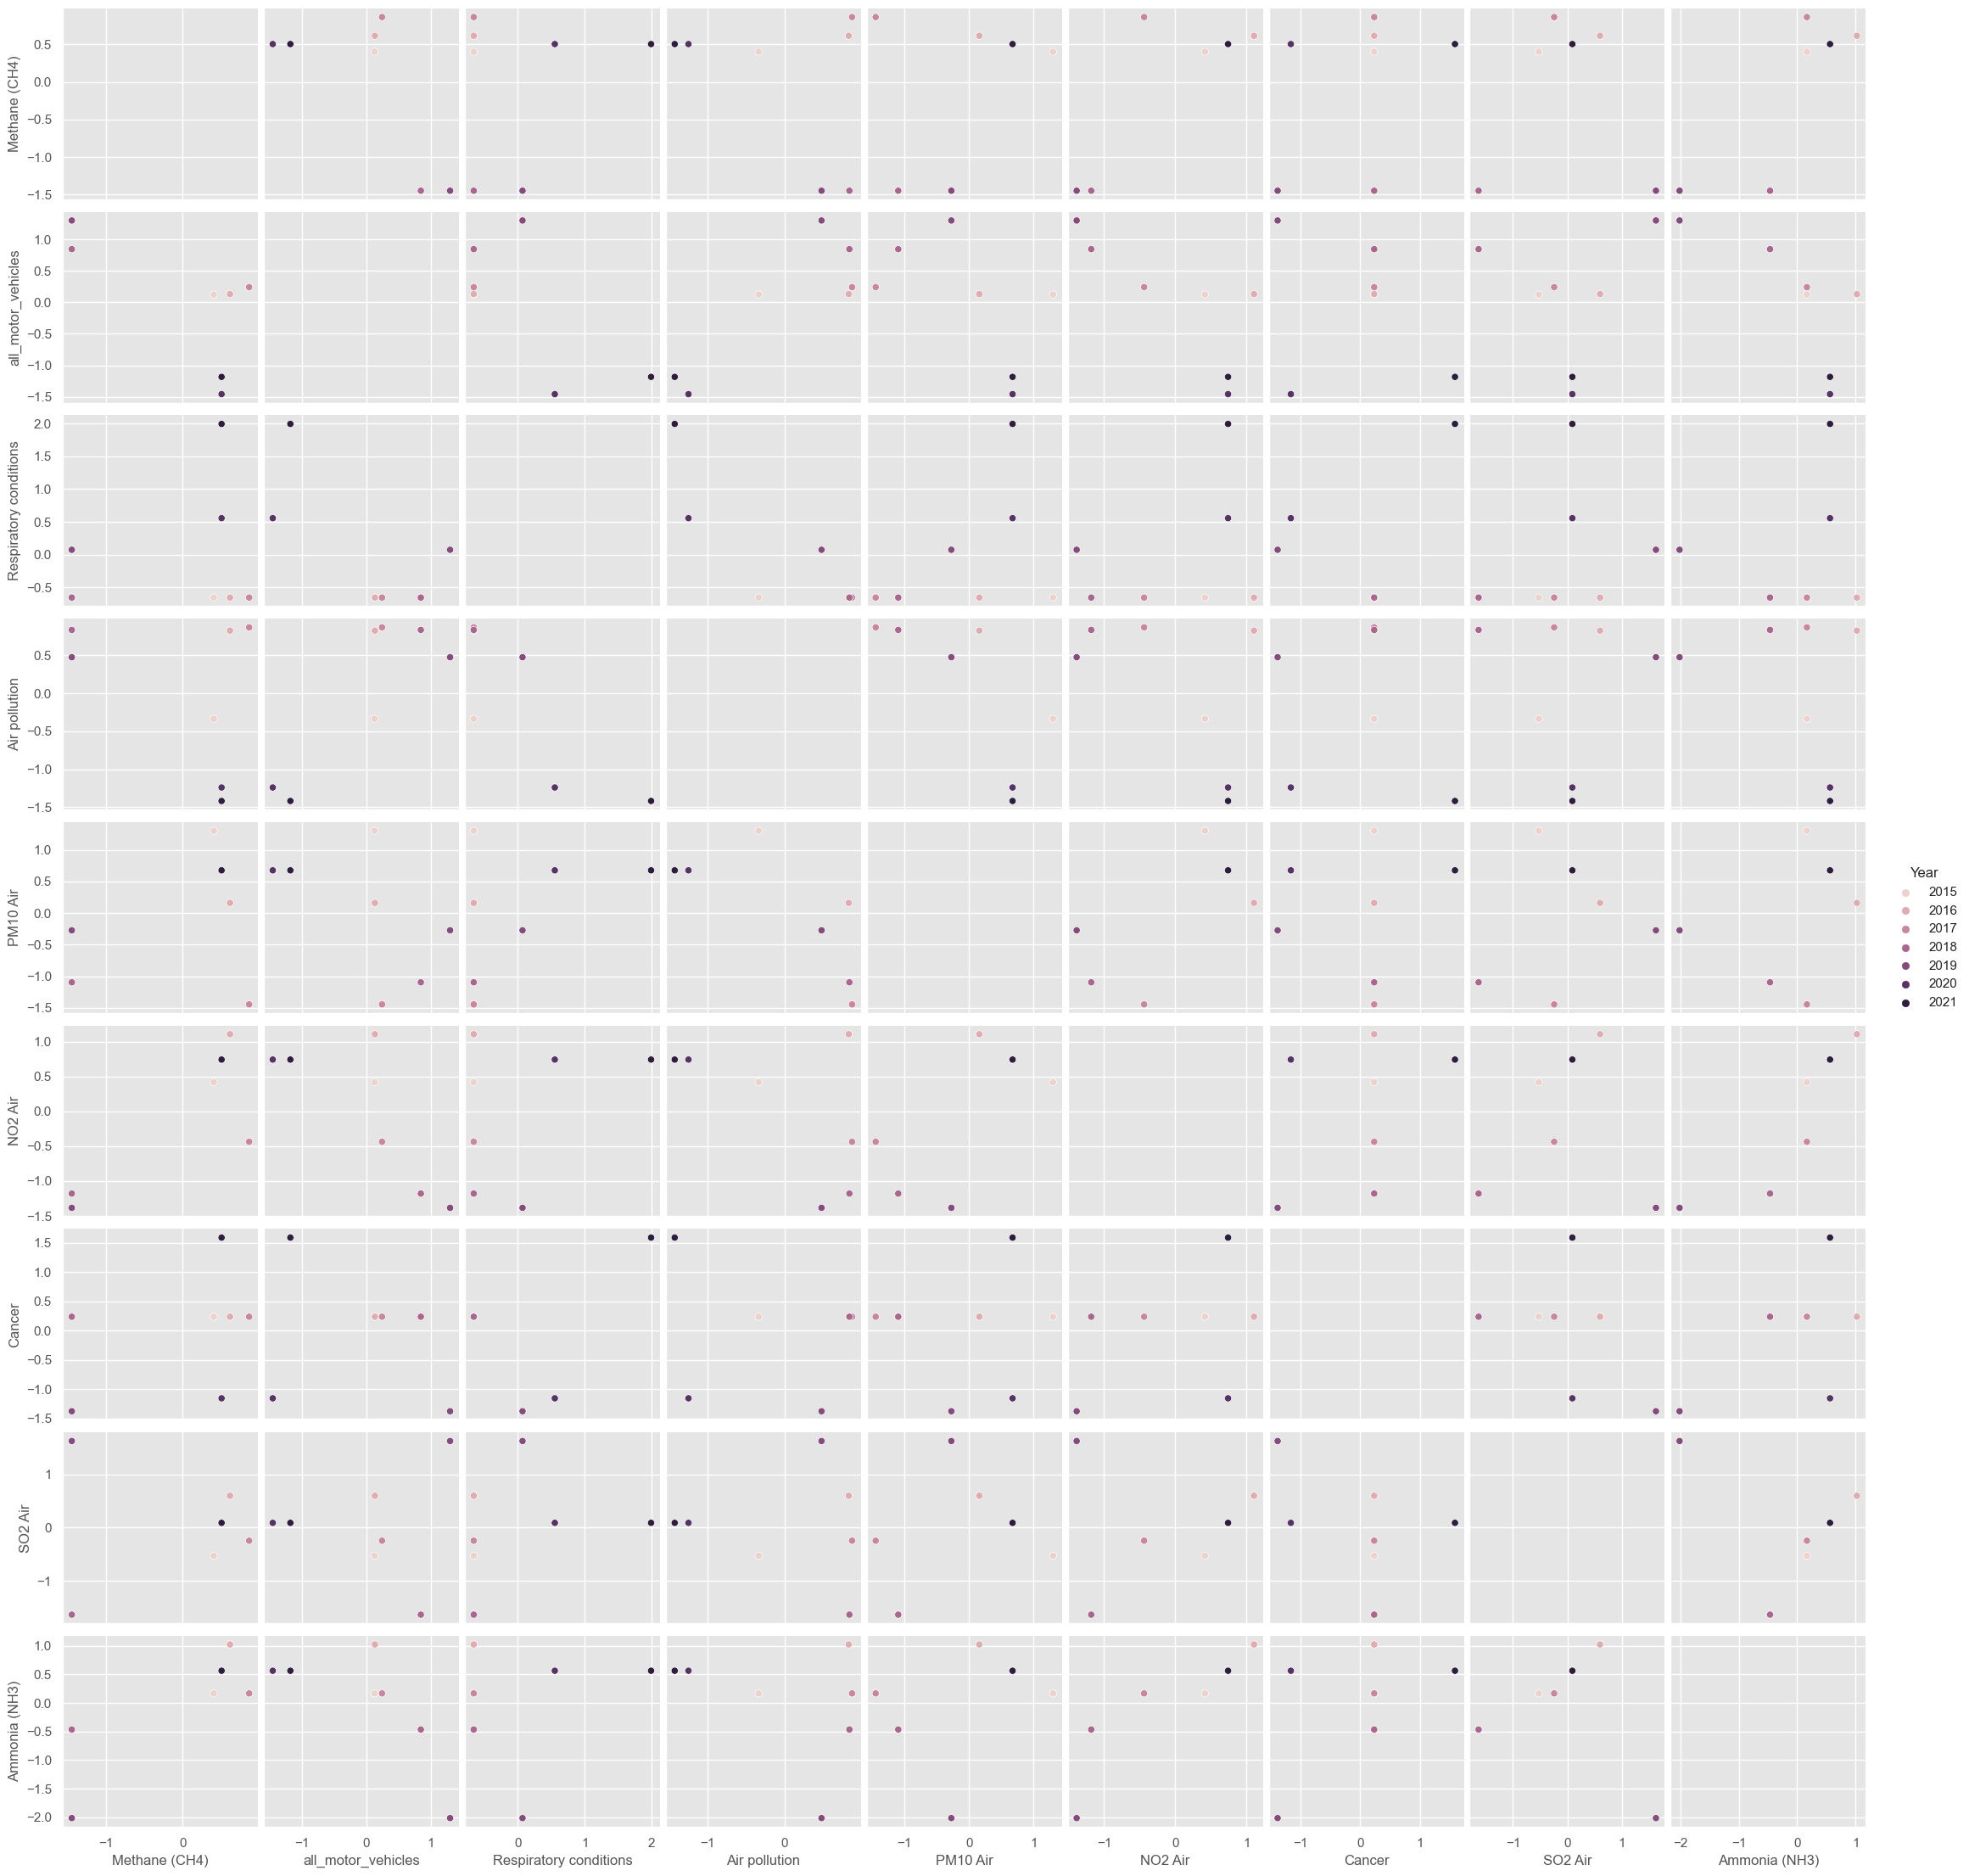

In [371]:
data1_reset = data1.reset_index()
sns.pairplot(data1_reset,vars= ['Methane (CH4)', 'all_motor_vehicles', 'Respiratory conditions',
                  'Air pollution','PM10 Air','NO2 Air',
                  'Cancer','SO2 Air','Ammonia (NH3)']
                  ,hue='Year')

The line chart confirms all the conclusions made in the pair plot analysis. This representation gives a clearer idea about the relashionship between the features compared to previous figure, however, it doesn't support all the features at once, the visualization would become too heavy and confusing, the stratagy of pairs would have to be adopted to realize that goal.

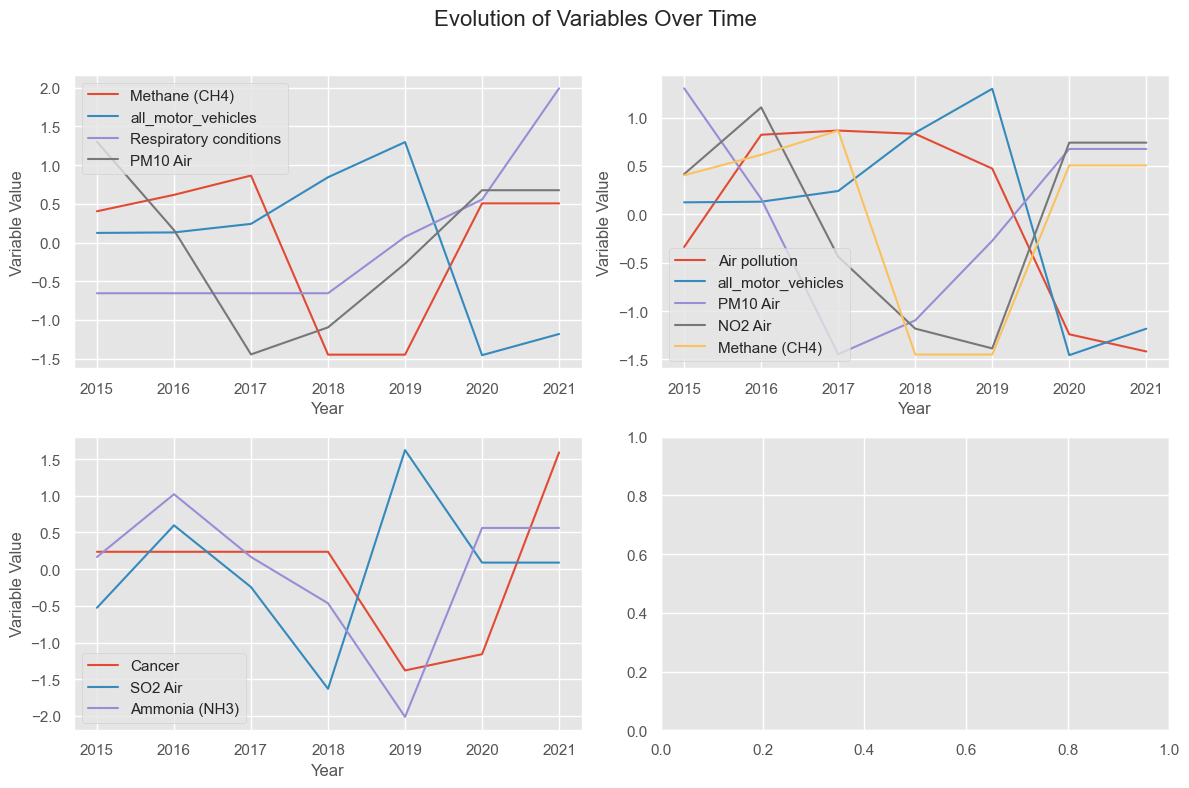

In [372]:
pairs_to_plot1 = [('Methane (CH4)', 'all_motor_vehicles', 'Respiratory conditions','PM10 Air'),
                  ('Air pollution','all_motor_vehicles','PM10 Air','NO2 Air','Methane (CH4)'),
                  ('Cancer','SO2 Air','Ammonia (NH3)')
                  ]
plot_variable_pairs(data1, pairs_to_plot1,figsize=(12,8))

In this pair plot is possibbe to see:

- Methane emssion is negatively correalted with the quatity of PM10 in the air.
- Quatity of PM10 and NO2 in the air are positively correlated.


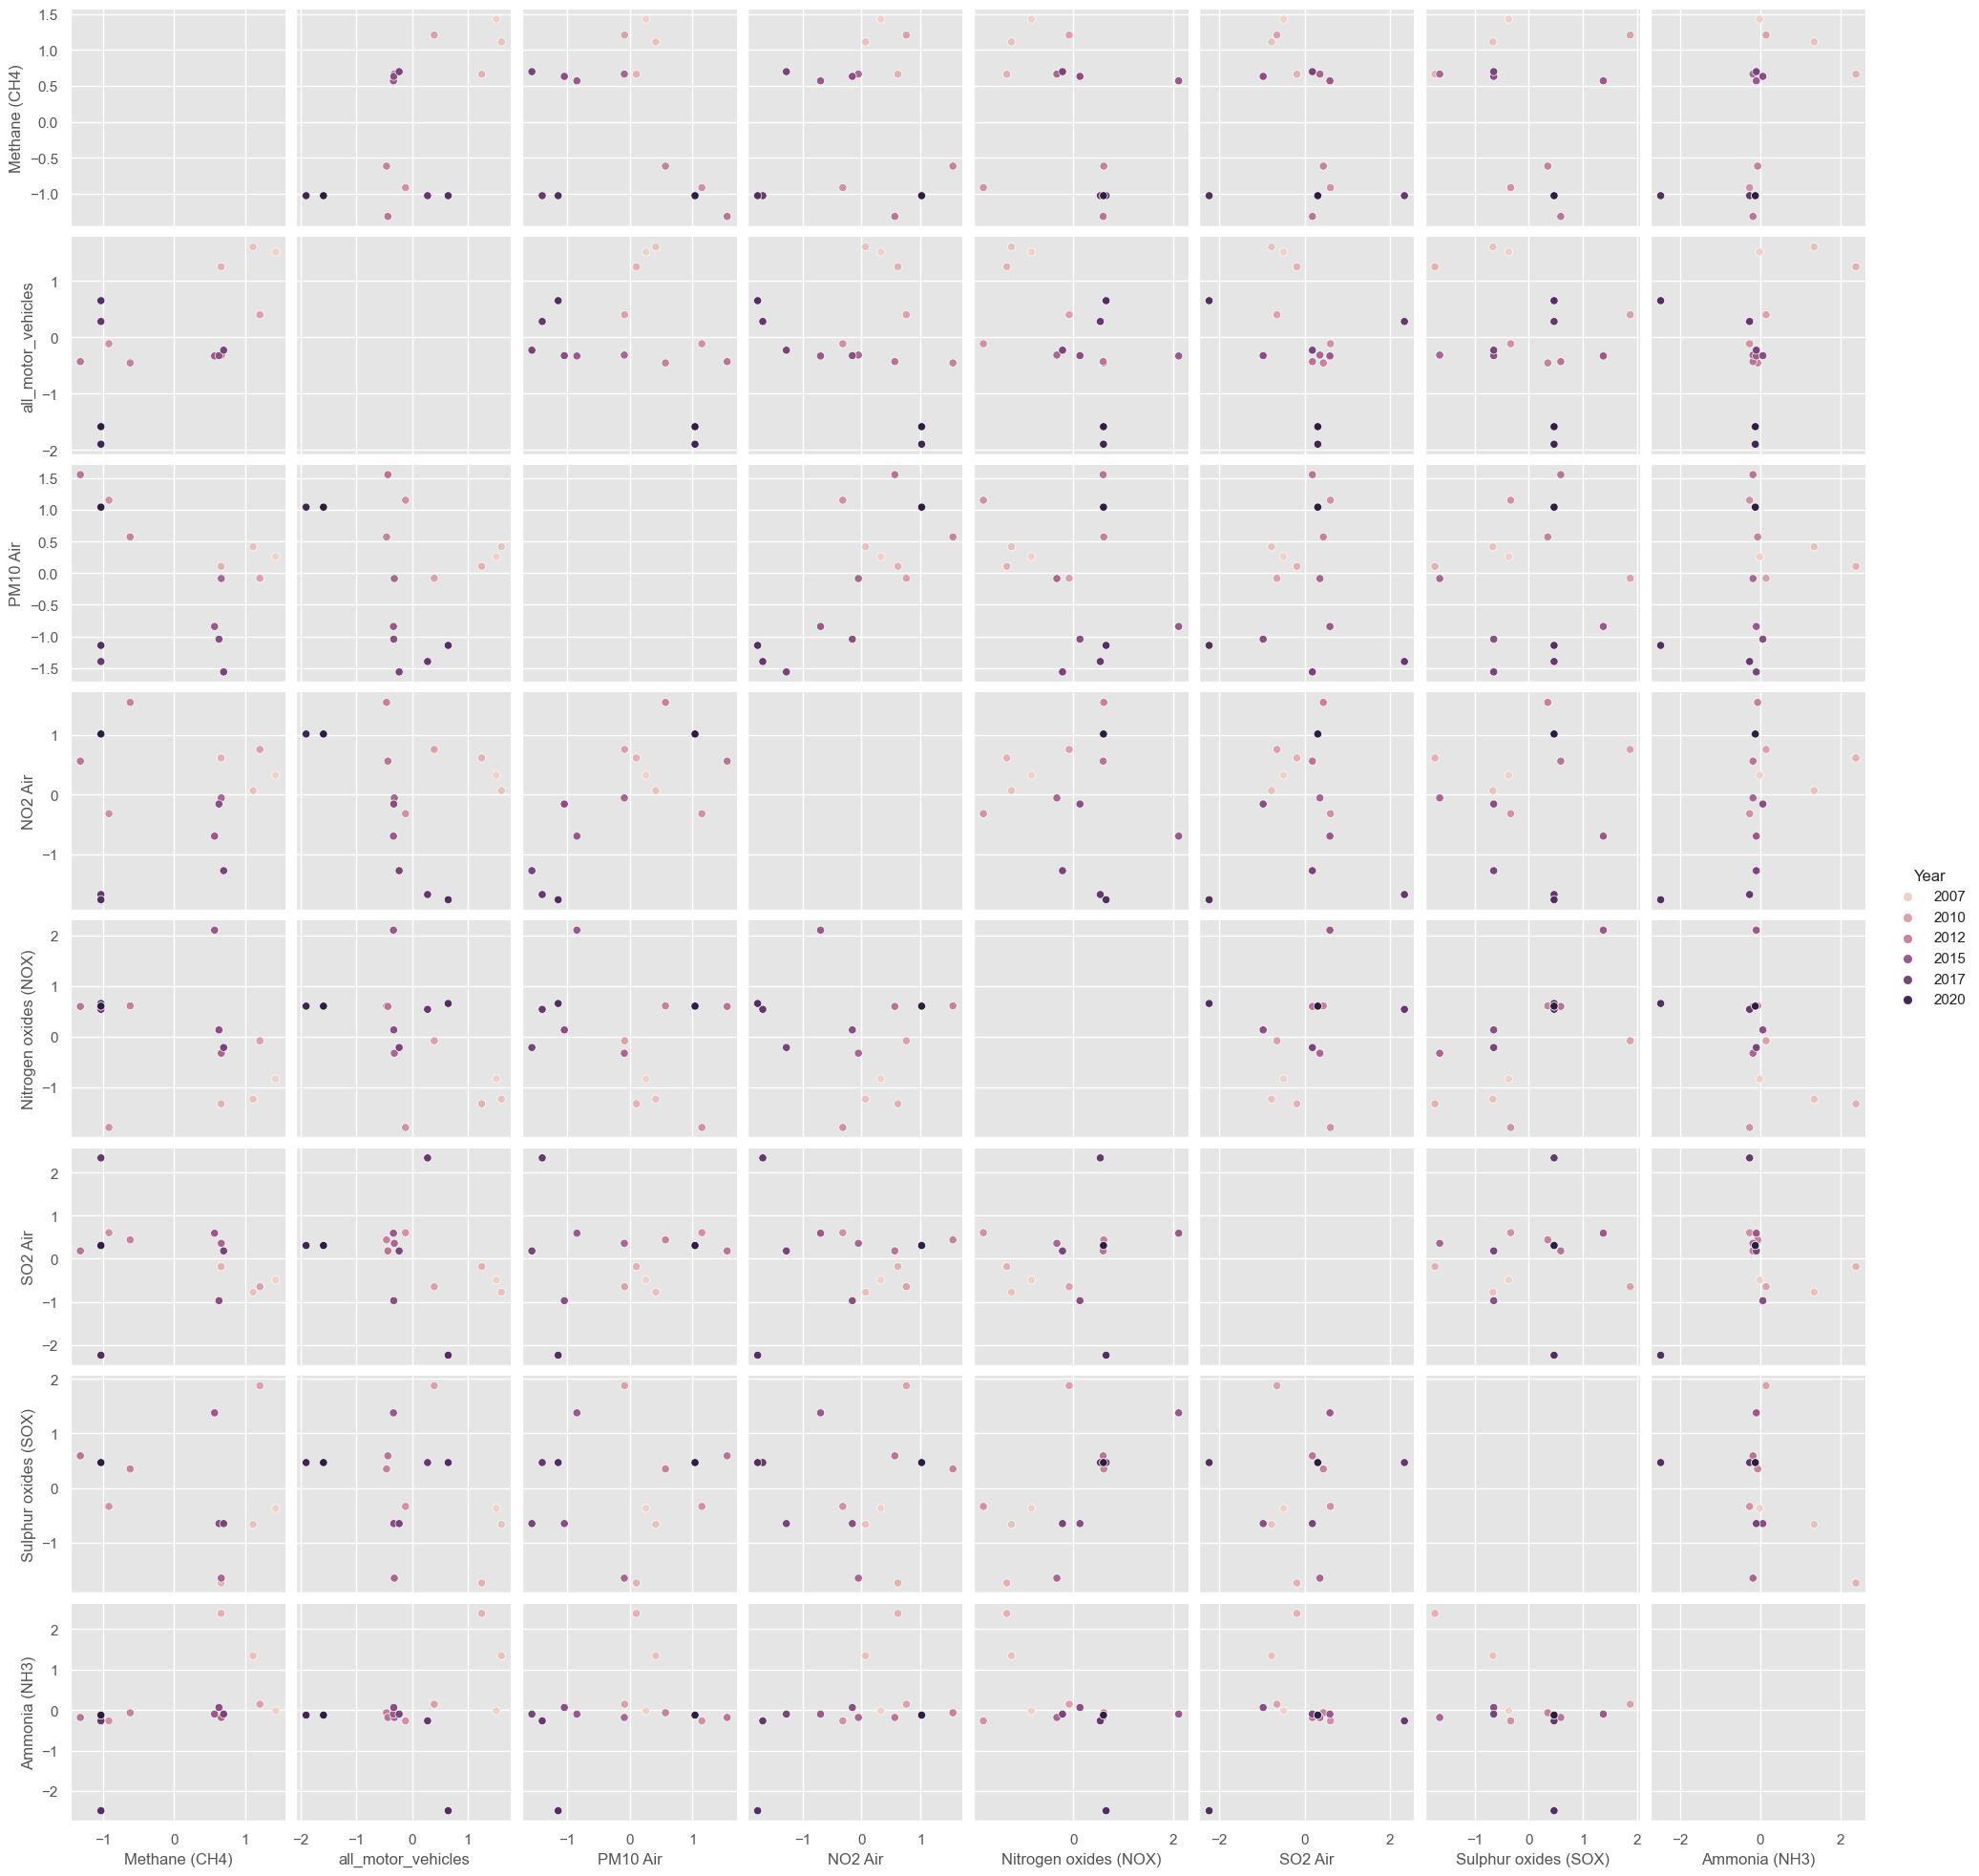

In [373]:
data2_reset = data2.reset_index()
sns.pairplot(data2_reset,vars= ['Methane (CH4)', 'all_motor_vehicles','PM10 Air','NO2 Air', 'Nitrogen oxides (NOX)','SO2 Air',
                                'Sulphur oxides (SOX)','Ammonia (NH3)'] ,hue='Year')

The set of line chart graphics confirm all the statements mentioned before except  the relation between NOX and vehicles flow.  
The relation doesn't corresponder to a negative correlation.

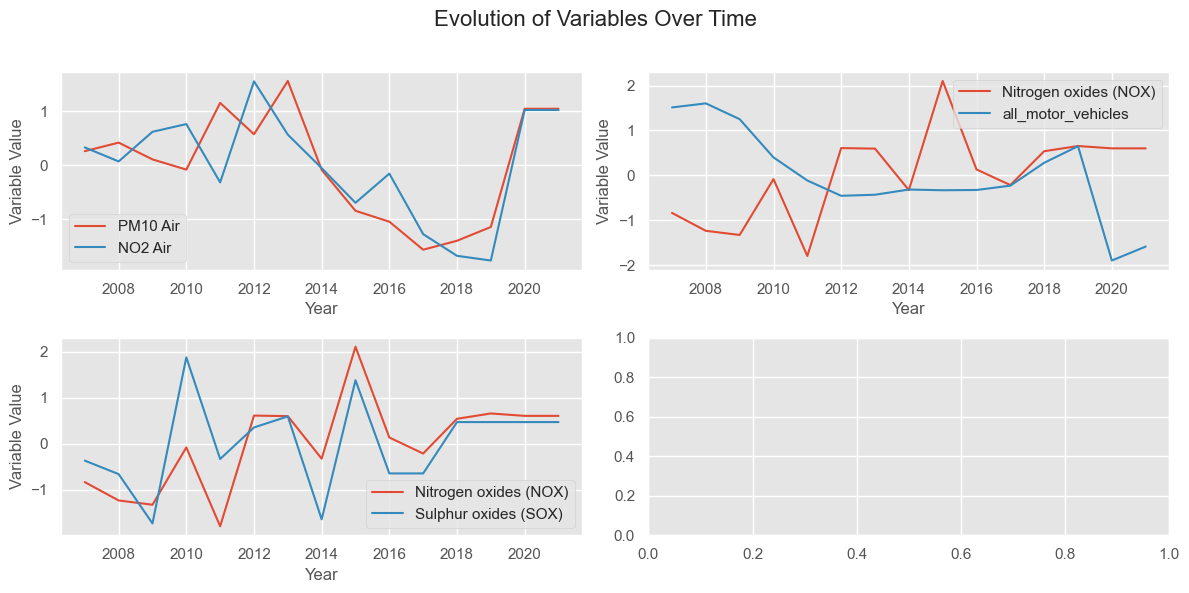

In [374]:
pairs_to_plot2 = [('PM10 Air','NO2 Air'),
                  ('Nitrogen oxides (NOX)','all_motor_vehicles'),
                  ('Nitrogen oxides (NOX)','Sulphur oxides (SOX)')]
plot_variable_pairs(data2, pairs_to_plot2,figsize=(12,6))


### Clustering

As part of a data analysis process called clustering, related data points are grouped together into discrete, homogeneous sets according to their shared traits or attributes. Finding patterns, similarities, and relationships in a dataset is the main goal of clustering, as it helps reveal underlying structure and promotes deeper comprehension.
There are several clustering algorithms, and each has advantages and disadvantages of its own. Among the widely used techniques are DBSCAN (Density-Based Spatial Clustering of Applications with Noise), hierarchical clustering, and K-means. Data is divided into a preset number of clusters using K-means algorithm.
We'll use this technique to look for patterns in the data and determine whether it works well with our data.

In [375]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data1['Cluster'] = kmeans.fit_predict(data1)

display(data1)


/home/casal/anaconda3/envs/firstEnv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,all_motor_vehicles,NO2 Air,PM10 Air,SO2 Air,Air pollution,Cancer,Respiratory conditions,Ammonia (NH3),Sulphur oxides (SOX),Methane (CH4),Nitrogen oxides (NOX),Cluster
Year,,,,,,,,,,,,
2015,0.124221,0.416349,1.302243,-0.525431,-0.336905,0.237017,-0.655211,0.166196,1.551976,0.404115,-1.620922,2
2016,0.130695,1.105527,0.160506,0.597542,0.822723,0.237017,-0.655211,1.021770,-1.255036,0.615931,0.822705,0
2017,0.241093,-0.437962,-1.445415,-0.244178,0.865855,0.237017,-0.655211,0.166196,-1.255036,0.865433,1.530405,0
2018,0.843416,-1.180832,-1.095935,-1.630185,0.831819,0.237017,-0.655211,-0.464807,0.469554,-1.448558,0.130411,1
2019,1.297587,-1.385476,-0.273085,1.622852,0.473009,-1.379931,0.073270,-2.013241,0.469554,-1.448558,-0.044503,1
2020,-1.455186,0.741196,0.675843,0.089700,-1.239481,-1.158447,0.555334,0.561943,0.009494,0.505819,-0.409048,2
2021,-1.181826,0.741196,0.675843,0.089700,-1.417020,1.590309,1.992242,0.561943,0.009494,0.505819,-0.409048,2


In [376]:
from sklearn.metrics import silhouette_score
features_for_clustering = data1.drop(columns=['Cluster'])
silhouette_avg = silhouette_score(features_for_clustering, data1['Cluster'])
print(f"The silhouette score for the clustering is: {silhouette_avg}")

The silhouette score for the clustering is: 0.24288783655404816


DATA2 Clustering


In [377]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data2['Cluster'] = kmeans.fit_predict(data2)

display(data2)


/home/casal/anaconda3/envs/firstEnv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,all_motor_vehicles,NO2 Air,PM10 Air,SO2 Air,Ammonia (NH3),Sulphur oxides (SOX),Methane (CH4),Nitrogen oxides (NOX),Cluster
Year,,,,,,,,,
2007,1.513797,0.328317,0.259706,-0.493381,-0.018860,-0.371466,1.427612,-0.837587,2
2008,1.604308,0.069903,0.417107,-0.775690,1.343575,-0.664205,1.110478,-1.237072,2
2009,1.251647,0.617188,0.107389,-0.181633,2.387793,-1.735782,0.661332,-1.329361,2
2010,0.399455,0.759782,-0.081154,-0.648107,0.143116,1.872636,1.206013,-0.083797,2
2011,-0.115487,-0.317024,1.151922,0.604131,-0.268520,-0.335706,-0.916530,-1.797667,0
2012,-0.456320,1.549413,0.571721,0.437569,-0.068135,0.349344,-0.617221,0.607314,0
2013,-0.432779,0.564327,1.555872,0.182436,-0.184376,0.589644,-1.317520,0.595576,0
2014,-0.316699,-0.053180,-0.085252,0.357418,-0.184376,-1.647194,0.663384,-0.329650,1
2015,-0.332504,-0.694199,-0.842286,0.591945,-0.101164,1.375715,0.569175,2.103742,1


In [378]:
features_for_clustering2 = data2.drop(columns=['Cluster'])
silhouette_avg = silhouette_score(features_for_clustering2, data2['Cluster'])
print(f"The silhouette score for the clustering is: {silhouette_avg}")

The silhouette score for the clustering is: 0.27488883269604536


The clusters in our data have some degree of separation, the clustering result is not very strong, and there may be room for improvement but they are not well-defined and indicate some points, as indicated by the small silhouette score of 0.24288783655404816 and 0.27488883269604536:
 - The score for the silhouette is a number between -1 and 1, with negative values suggesting that data points might have been incorrectly assigned to clusters. A score this close to zero, as it is in our instance, indicates that there may be some overlap or ambiguity in the way the points are assigned to the clusters and that the clusters are not clearly separated.
 - Clusters that lack cohesiveness or are difficult to differentiate from one another.
 - The Possible Overfitting, A clustering algorithm that is too sensitive to noise or has too many clusters may produce tiny.




 

### PCA / Dimension Reduction


PCA is very usefull tecnique that can be used in various areas with the goal of reduzing the file size or for computacional efficiency purposes.  
It allows  a reduction of dimensionality of data making all variables independent, so , if the data has n features the PCA will produce n components, knowing that var(PC1) > var (PC2) > ... var(PC2), i.e, the first compenents have more variance, more representation of the data.  
This is done by rotation the axis in way the first axis goes trough, as many points as possbile, the same happens to the second etc...

In this chapter, PCA will be used has an aditional tool to obtain inforamtion about data, more specifically using BiPlot, For that matter we will use the first two components of the PCA.

In [379]:
def apply_pca(data):
    pca = PCA(n_components=2) 
    X_pca = pca.fit_transform(data)
    PC1 = X_pca[:,0]
    PC2 = X_pca[:,1]
    scalePC1 = 1.0/(X_pca[:,0].max() - X_pca[:,0].min())
    scalePC2 = 1.0/(X_pca[:,1].max() - X_pca[:,1].min())
    data1_pca = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])
    data1_pca.index = data.index
    ldngs = pca.components_
    return ldngs,PC1,PC2,scalePC1,scalePC2,data1_pca

[4] A biplot is a standard way of showing the sample scores and variable loadings in a single
plot. Doing this will not only show which samples are similar to one another, but how the
variables control this similarity.

We have some ways to take infroamtion from a biplot:

- We can infer the relation between the variables by the angle that the form with each other. For example, if to variables form an angle of 0 the correlation is maximun, because cos(0) = 1.
- It's possible to see if a variable present values above or under average for a certain year, by projection the point of the year into the vector of the variable. For example if the projection intersects with the vector after the end of that same vector, we can conclude that the the point is above average.

#### BiPlot

In [380]:
def biplot(data, ldngs, PC1, PC2, scalePC1, scalePC2, figsize=(14, 9)):
    fig, ax = plt.subplots(figsize=figsize)
    features = data.columns
    
    # Add this line to obtain the explained variance for PC1 and PC2
    explained_var_pc1 = np.var(PC1 * scalePC1)
    explained_var_pc2 = np.var(PC2 * scalePC2)

    for i, feature in enumerate(features):
        ax.arrow(0, 0, ldngs[0, i], ldngs[1, i], head_width=0.01, head_length=0.01, color="red")
        ax.text(ldngs[0, i] * 1.15, ldngs[1, i] * 1.15, feature, color="red", fontsize=12)

        ax.scatter(PC1 * scalePC1, PC2 * scalePC2, s=5)

    for i, label in enumerate(data.index):
        ax.text(PC1[i] * scalePC1, PC2[i] * scalePC2, str(label), fontsize=16)

    # Include the variance explained in the x and y labels
    ax.set_xlabel(f'PC1 (Explained Variance: {explained_var_pc1:.2%})', fontsize=14)
    ax.set_ylabel(f'PC2 (Explained Variance: {explained_var_pc2:.2%})', fontsize=14)
    ax.set_title('Biplot with Variance Explained', fontsize=20)

##### Data1

In [381]:
ldngs,PC1,PC2,scalePC1,scalePC2,data1_pca = apply_pca(data1)
data1_pca

,Principal Component 1,Principal Component 2
Year,,
2015,1.541671,-1.571641
2016,-0.311065,2.376985
2017,-1.848710,2.351661
2018,-2.157487,-0.796209
2019,-2.461412,-2.321588
2020,2.203383,-0.236838
2021,3.033621,0.197630


Observations:
- Respiratory conditions are very related with PM10 and have a decent correlation with NO2, however, is negatively correlated with Air pollution, vehicles flow and NOX emission.  
In the year 2015,2020, 2021 the level of respiratory conditions were above average and in 2017, 2018 under average.
- Cancer has a huge correlation with Ammonia and Methane a great relation with NO2.  
Year 2021 is highlighted by its level of cancer index and are above average, 2018 and 2019 present low levels of cancer level compared to the other examples
- Air polution has some connection with NOX emission and traffic flow is negatively correlated with the quantity if PM10 in the air.
 The year 2018 and 2019 have values above average and 2015,2020 under the average. In the 2021 the level of air pollution is really low compared to the other values

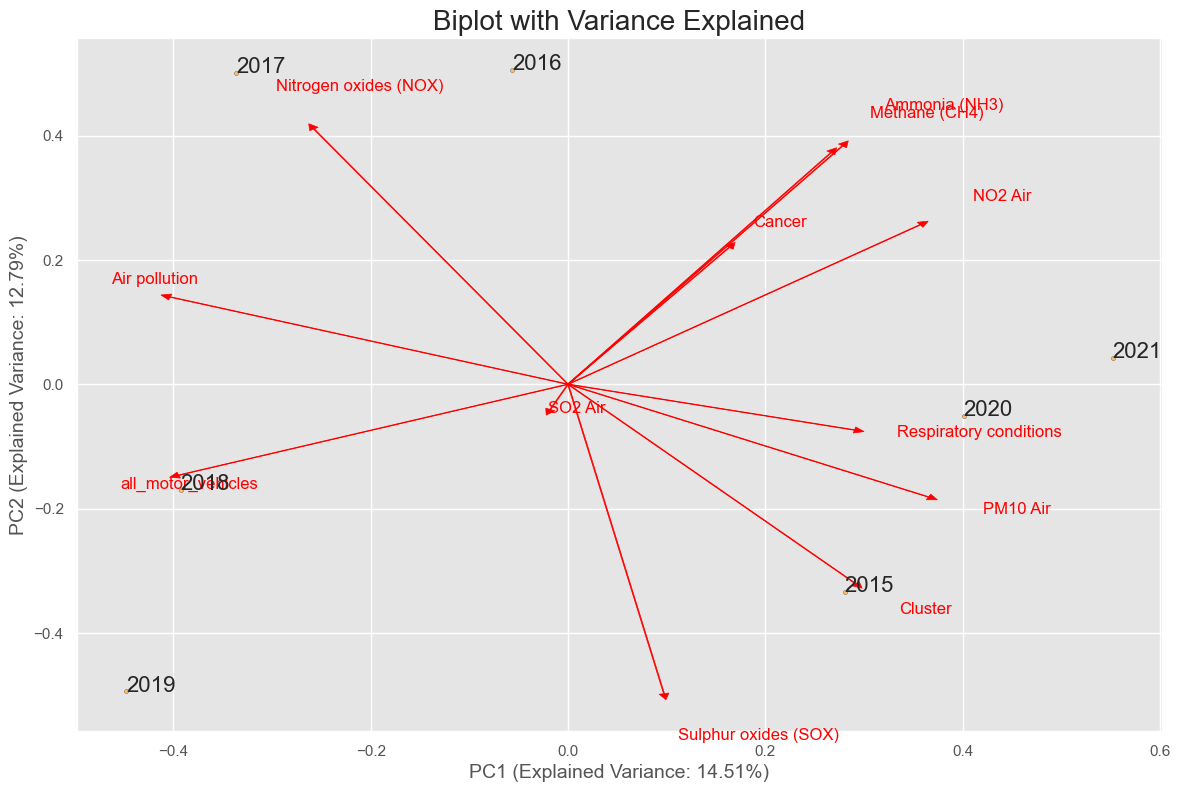

In [382]:
biplot(data1,ldngs,PC1,PC2,scalePC1,scalePC2)

In [383]:
ldngs,PC1,PC2,scalePC1,scalePC2,data1_pca = apply_pca(data2)
data1_pca

,Principal Component 1,Principal Component 2
Year,,
2007,2.260104,-0.040370
2008,2.905412,-0.641273
2009,3.181197,-1.560834
2010,0.692689,0.225325
2011,-0.338865,-1.211542
2012,-1.447650,-1.306885
2013,-1.902126,-1.237440
2014,0.749176,-0.239883
2015,-1.180678,1.602326


In this data the quantity of year is superior,so , we will only highlight some cases
Observations:
- Emmission of NOX and SOX are really related, but, they are negatively correlated with NH3. In 2008 and 2009 the values of those were really under average, and, the peak was reached in the year 2015,2019,2020,2021, all having similar values.
- The evolution of the quantity if NO2 and PM10 in the air is very similar and with can highlight the year 2019 with a really low quantity of those components.
- Traffic flow and emissions of methane have a strong relashionship and a negative one with SO2. We can emphasize the values obtain in 2008 and 2009 that are very similar and are the maximum, on the other hand, 2020 and 2021 are the lowest.
- SO2 is not strongly related with any features, however, shares a weak relashionship with SOX,NOX,PM10,NO2. What we talked about in the previous point about the year can be applied here but inversely.
- NH3 has a weak correaltion with all variables except NOX and SOX, it reached its maximun at 2009 but 2008 present a pretty high value aswell, 2019 presents the lowest value.

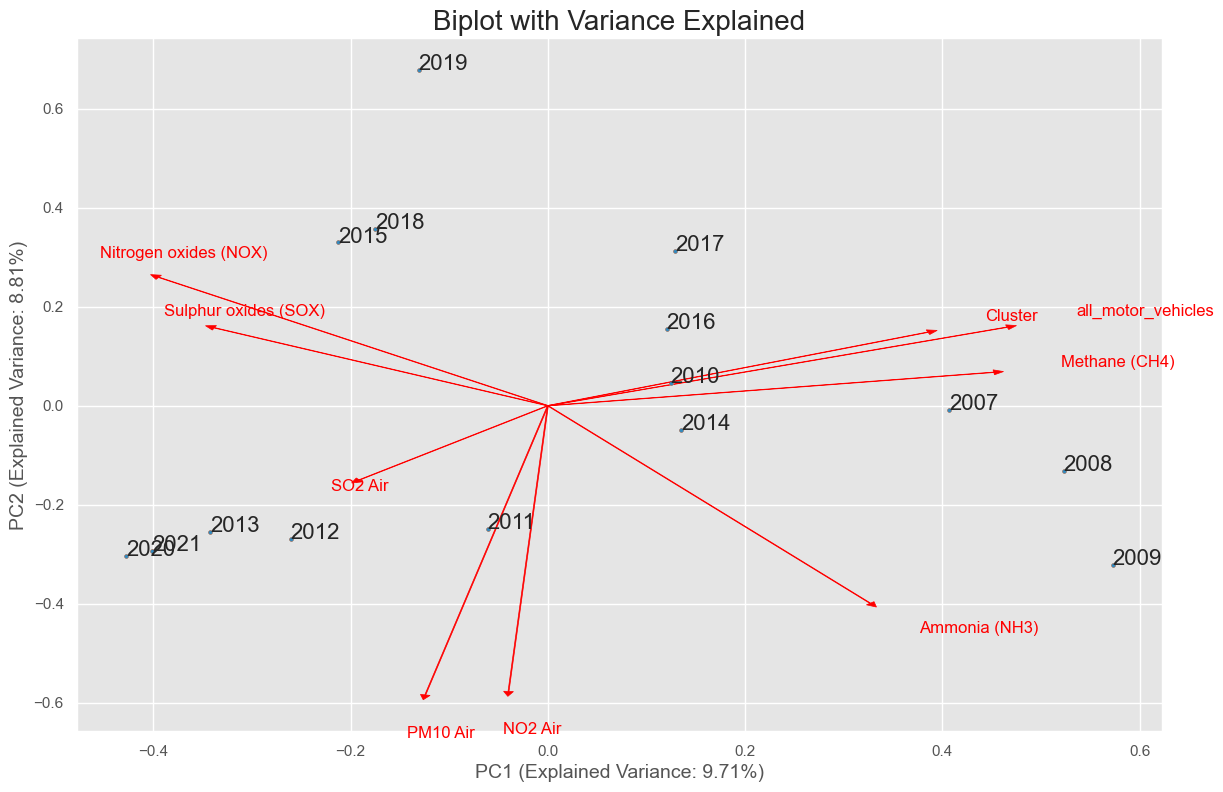

In [384]:
biplot(data2,ldngs,PC1,PC2,scalePC1,scalePC2)

The Biplot alowed us to take some conclusions about the data and to see it in a perspective that is not possible in other methodologies.

### Pollution data analysis

In this chapter some usefull information will be withdrawn from the pollution data using the . 

#### Sector 

North of England:

    Manchester
    Edinburgh
    Leeds

South of England:

    London
    Southampton
    Bristol

Central England (Midlands):

    Coventry
    Derby
    Leicester

In [385]:
data_pol = pd.read_csv("datasets/pollution.csv",low_memory=False)

data_pol.head(2)

,countryName,EPRTRSectorCode,eprtrSectorName,EPRTRAnnexIMainActivityCode,EPRTRAnnexIMainActivityLabel,FacilityInspireID,facilityName,facilityNameConfidentialityReason,Longitude,Latitude,addressConfidentialityReason,City,targetRelease,pollutant,emissions,reportingYear,releasesConfidentialityReason
0,Austria,4.0,Chemical industry,4(d),Chemical installations for the production on a...,AT.CAED/9008390392737.FACILITY,Nufarm GmbH & CO KG,NaN,14.336056,48.290943,NaN,Linz,AIR,"1,2-dichloroethane (DCE-1,2)",3300.0,2007,NaN
1,Austria,9.0,Other activities,9(c),Installations for the surface treatment of sub...,AT.CAED/9008390396414.FACILITY,MAGNA STEYR Fahrzeugtechnik AG&Co KG,NaN,15.477778,47.019170,NaN,"Graz,07.Bez.:Liebenau",AIR,Non-methane volatile organic compounds (NMVOC),170000.0,2007,NaN


In [386]:
cities = ['Manchester', 'Edinburgh', 'Leeds', 'London', 'Southampton', 'Bristol', 'Coventry', 'Derby', 'Leicester']
data_pol = data_pol.loc[:,["pollutant","emissions","City"]]
data_pol.head(2)

,pollutant,emissions,City
0,"1,2-dichloroethane (DCE-1,2)",3300.0,Linz
1,Non-methane volatile organic compounds (NMVOC),170000.0,"Graz,07.Bez.:Liebenau"


In [387]:
data_pol = data_pol[data_pol['City'].isin(cities)]
len(data_pol['City'].unique())

9

Text(0.5, 1.0, 'Distribution of cities')

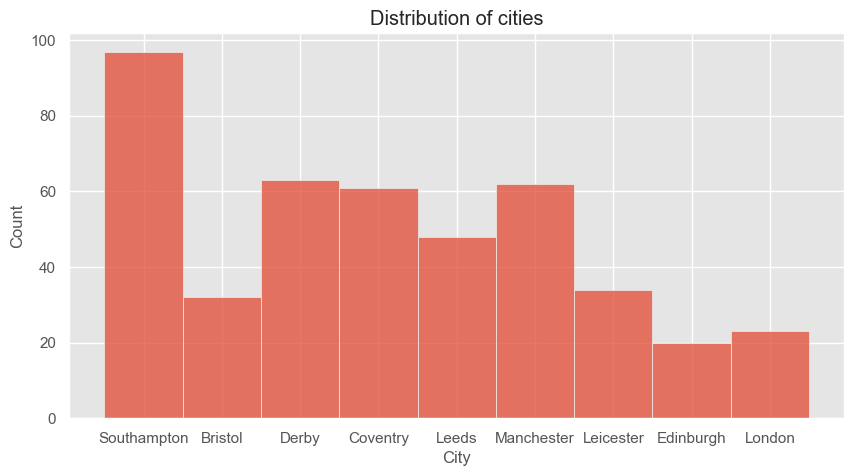

In [388]:
plt.figure(figsize=(10,5))
sns.histplot(data_pol["City"])
plt.title("Distribution of cities")

UNDERSAMPLING

In [389]:
min_occurrences = min(data_pol['City'].value_counts()[cities])

# Undersample each column to have the same number of elements as the minimum occurrences
undersampled_data_pol = pd.concat([
    data_pol[data_pol['City'] == city].sample(min_occurrences, replace=False) 
    for city in cities
 ])

Text(0.5, 1.0, 'Distribution of cities')

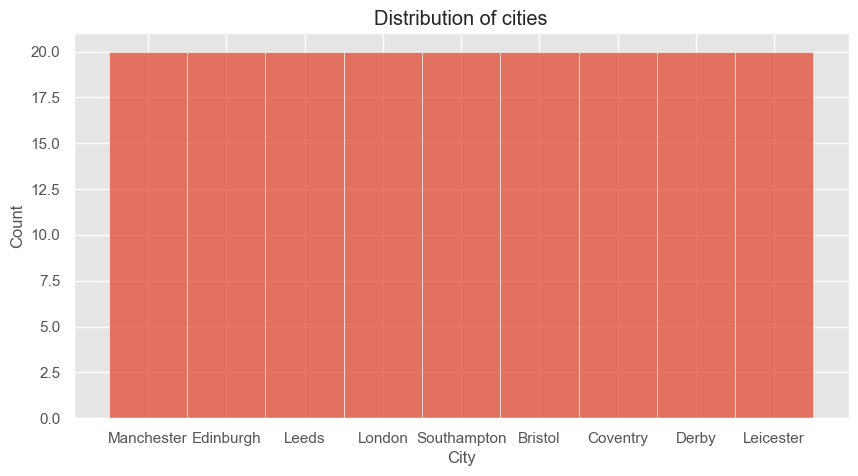

In [390]:
plt.figure(figsize=(10,5))
sns.histplot(undersampled_data_pol["City"])
plt.title("Distribution of cities")

In [391]:
label_encoder = LabelEncoder()

undersampled_data_pol["pollutant"] = label_encoder.fit_transform(undersampled_data_pol["pollutant"])


In [392]:
undersampled_data_pol

,pollutant,emissions,City
310522,8,7810.0,Manchester
315785,18,1130.0,Manchester
307056,3,306000000.0,Manchester
316025,14,178000.0,Manchester
305426,5,28.9,Manchester
...,...,...,...
308312,11,256000.0,Leicester
294049,11,2030000.0,Leicester
323659,11,218000.0,Leicester
302663,11,273000.0,Leicester


In [393]:
undersampled_data_pol_final = undersampled_data_pol.iloc[:,0:2]


In [394]:
undersampled_data_pol_final['emissions_normalized'] = undersampled_data_pol_final.groupby('pollutant')['emissions'].transform(lambda x: (x -x.mean()) / x.std())

In [395]:
undersampled_data_pol_final.drop(columns=['emissions'], inplace=True)
undersampled_data_pol_final=undersampled_data_pol_final.rename(columns={'emissions_normalized':'emissions'})


In [396]:
undersampled_data_pol_final

,pollutant,emissions
310522,8,1.651515
315785,18,-0.717965
307056,3,-0.380704
316025,14,-0.493143
305426,5,0.533981
...,...,...
308312,11,-0.426964
294049,11,0.431697
323659,11,-0.445357
302663,11,-0.418736


In [397]:
undersampled_data_pol_final= pd.concat([undersampled_data_pol_final,undersampled_data_pol["City"]],axis=1)
undersampled_data_pol_final

,pollutant,emissions,City
310522,8,1.651515,Manchester
315785,18,-0.717965,Manchester
307056,3,-0.380704,Manchester
316025,14,-0.493143,Manchester
305426,5,0.533981,Manchester
...,...,...,...
308312,11,-0.426964,Leicester
294049,11,0.431697,Leicester
323659,11,-0.445357,Leicester
302663,11,-0.418736,Leicester


In [398]:
undersampled_data_pol_final = undersampled_data_pol_final.dropna(subset=['emissions'])

undersampled_data_pol_final.reset_index(drop=True, inplace=True)


In [399]:
undersampled_data_pol_final

,pollutant,emissions,City
0,8,1.651515,Manchester
1,18,-0.717965,Manchester
2,3,-0.380704,Manchester
3,14,-0.493143,Manchester
4,5,0.533981,Manchester
...,...,...,...
169,11,-0.426964,Leicester
170,11,0.431697,Leicester
171,11,-0.445357,Leicester
172,11,-0.418736,Leicester


Silhouette Score: 0.652335408965317


/home/casal/anaconda3/envs/firstEnv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_5523/674174513.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  undersampled_data_pol_final['Cluster'] = labels


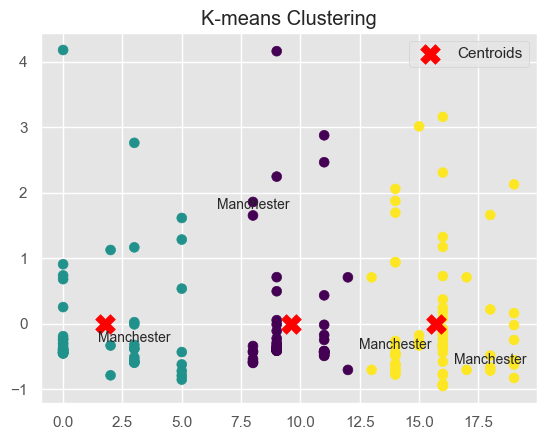

In [400]:

k_data = undersampled_data_pol_final.iloc[:,0:2]

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(k_data)

centers = kmeans.cluster_centers_
labels = kmeans.labels_

undersampled_data_pol_final['Cluster'] = labels

silhouette_avg = silhouette_score(k_data, labels)
print(f"Silhouette Score: {silhouette_avg}")


plt.scatter(k_data.iloc[:, 0], k_data.iloc[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')

for i, city in enumerate(undersampled_data_pol['City']):
    if(i==undersampled_data_pol_final.shape[1]):
        break
    plt.annotate(city, (k_data.iloc[i, 0], k_data.iloc[i, 1]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('K-means Clustering')
plt.legend()
plt.show()

We can infer from this plot that there are three clusters that are highly explicable and that indicate certain patterns in our data. 

In [401]:
undersampled_data_pol_final

,pollutant,emissions,City,Cluster
0,8,1.651515,Manchester,0
1,18,-0.717965,Manchester,2
2,3,-0.380704,Manchester,1
3,14,-0.493143,Manchester,2
4,5,0.533981,Manchester,1
...,...,...,...,...
169,11,-0.426964,Leicester,0
170,11,0.431697,Leicester,0
171,11,-0.445357,Leicester,0
172,11,-0.418736,Leicester,0


Since our objective is to examine regional pollution patterns, we will assume that cities within the same cluster will exhibit similar patterns of behavior. If the majority of the examples point to a particular cluster, we will consider a city to be a member of that cluster.  

- Southampton, Leeds are in Cluster 0; 
- Edingburgh is in Cluster 1; 
- Manchester, Bristol, and Leicester are in Cluster 2.

Thus, it can be inferred that there are differences in patterns between the cities in the same region.


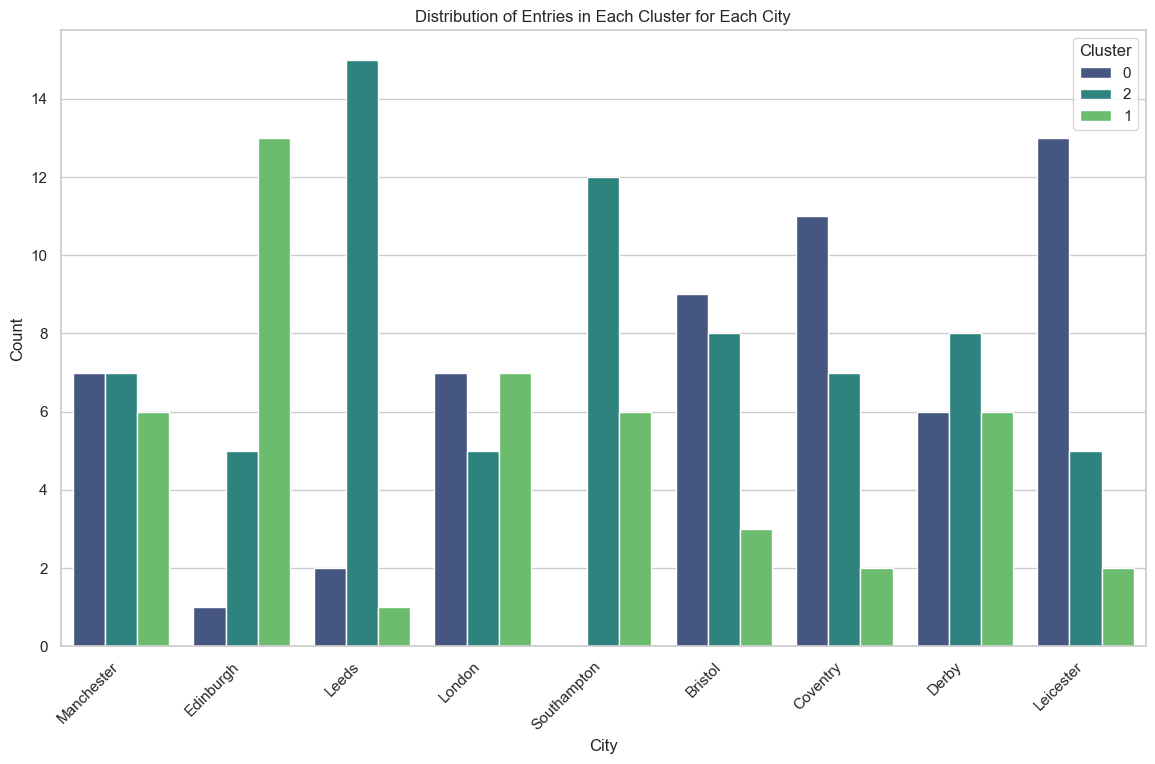

In [402]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

undersampled_data_pol_final.loc[:,'Cluster'] = undersampled_data_pol_final.loc[:,'Cluster'].astype(str)

sns.countplot(x='City', hue='Cluster', data=undersampled_data_pol_final, palette='viridis')
plt.title('Distribution of Entries in Each Cluster for Each City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Cluster', loc='upper right')
plt.show()

### References

[1] https://www.statology.org/what-is-a-strong-correlation/  
[2] Morgenthaler, S. (2009), Exploratory data analysis. WIREs Comp Stat, 1: 33-44  
[3] https://leanscape.io/data-distributions-explained-what-are-the-different-types-of-distribution/  
[4] PRINCIPAL COMPONENTS ANALYSIS (PCA) Steven M. Holland Department of Geology, University of Georgia, Athens, GA 30602-2501  
[5] https://medium.com/turing-talks/clustering-conceitos-b%C3%A1sicos-principais-algoritmos-e-aplica%C3%A7%C3%A3o-ace572a062a9